<h1>Dawood Sarfraz </h1>
<h1> Duplicate Questions using RandomForestClassifier and XGBoostClassifier with Basic Feature Engineering </h1>

# Dataset Description
The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

<b>Please note:</b> 
All of the questions in the training set are genuine examples from Quora.

# Data fields
<b>* id - </b> the id of a training set question pair </br>
<b>* qid1, qid2 - </b>- unique ids of each question (only available in train.csv) </br>
<b>* question1, question2 - </b>- the full text of each question </br>
<b>* is_duplicate - </b> the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.</br>

# With some Basic Feature Engineering

#### Q1 total words -> No. of words in Question 1
#### Q2 total words -> No. of words in Question 2
#### Q1 length -> Character length in Question 1
#### Q2 length -> Character length in Question 2
#### Words common in both questions -> Unique words in both like I'm Dawood. My name is DAwood. Here Dawood is Common 
#### Total Words in questions. -> Mean (words of Q1 + words of Q2)
#### Shared words -> Question1 & Question2 (common words / Total words) mean how much words are same in both questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.tail(5)

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [6]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
378207,378207,509589,509590,My ex was physically and emotionally abusive a...,Will one with abusive tendencies change over t...,0
135150,135150,215887,215888,Why dont the native americans get their own st...,Why is there no Native American country?,0
187621,187621,285917,198666,What is an informal economy? What are the adva...,What are the advantages and disadvantages of a...,1
245898,245898,189674,358836,You are being banished to a deserted island. E...,"How would you answer the question, ""If everyon...",0
182727,182727,279596,279597,Are all backgrounds websites the same?,Is it advisable to have a website and app that...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

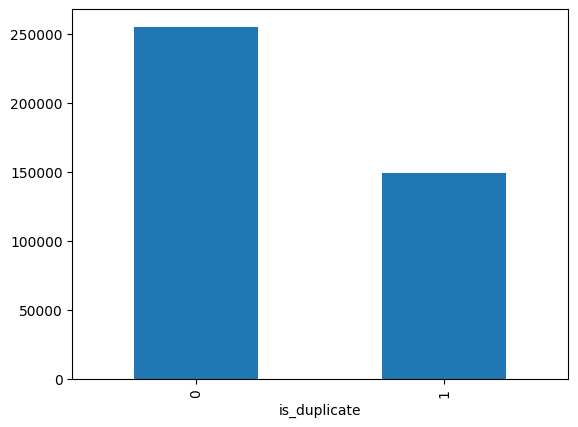

In [11]:
df["is_duplicate"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

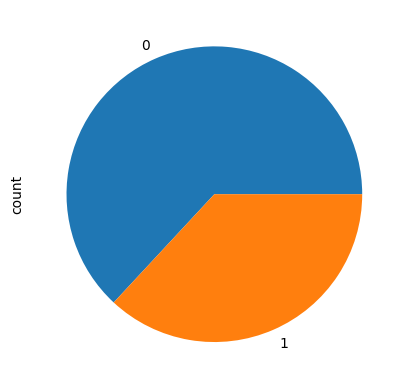

In [12]:
df["is_duplicate"].value_counts().plot(kind="pie")

In [13]:
qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print("Number of Unique questions",np.unique(qid).shape[0])

Number of Unique questions 537933


In [14]:
x = qid.value_counts()>1
print("Number of questions repeated",x[x].shape[0])

Number of questions repeated 111780


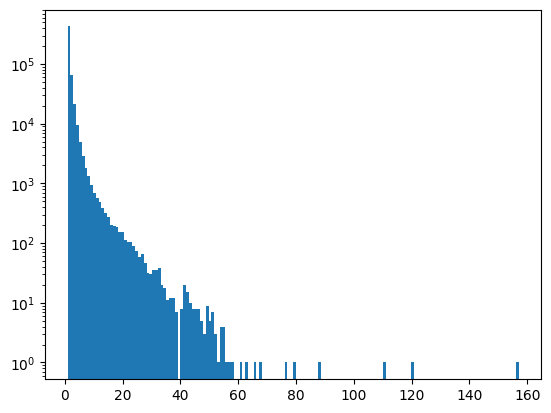

In [15]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

In [16]:
new_df = df.sample(20000,random_state=0)

In [17]:
new_df.shape

(20000, 6)

In [18]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [19]:
new_df.duplicated().sum()

0

In [20]:
new_df = new_df.dropna()

In [21]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [22]:
new_df["q1_chars"] = new_df["question1"].str.len()
new_df["q2_chars"] = new_df["question2"].str.len()

In [23]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars
187265,187265,61254,82970,Are we near World War 3?,Is World War 3 closer than it has ever been?,1,24,44
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47
139264,139264,221574,221575,Why are Newton's rings circular in shape? Why ...,Why is a circular ring pattern obtained in New...,0,76,64
240135,240135,227307,351892,How does Wikipedia ensure content quality / au...,How does Wikipedia keep content quality high?,1,71,45
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,52,32
...,...,...,...,...,...,...,...,...
329087,329087,455711,455712,Why is atheism authoritative in academic denia...,Why are moderators on Quora heavily biased in ...,0,148,64
53257,53257,94172,7614,Is being introverted bad?,How do introverts enjoy life?,0,25,29
33097,33097,60852,60853,How can I win the Amazon India buy box when I ...,"How can I win the Amazon India buy box, when I...",1,82,83
84600,84600,143012,143013,Can you remove a turtle from its shell without...,Can turtles go inside their shells when they a...,0,58,60


In [24]:
new_df["num_of_words_q1"] = new_df["question1"].apply(lambda row: (len(row.split(' '))))
new_df["num_of_words_q2"] = new_df["question2"].apply(lambda row: (len(row.split(' '))))

In [25]:
new_df.shape

(20000, 10)

In [26]:
new_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2
187265,187265,61254,82970,Are we near World War 3?,Is World War 3 closer than it has ever been?,1,24,44,6,10
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47,7,8
139264,139264,221574,221575,Why are Newton's rings circular in shape? Why ...,Why is a circular ring pattern obtained in New...,0,76,64,14,11
240135,240135,227307,351892,How does Wikipedia ensure content quality / au...,How does Wikipedia keep content quality high?,1,71,45,10,7
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,52,32,10,6


In [27]:
new_df.tail(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2
329087,329087,455711,455712,Why is atheism authoritative in academic denia...,Why are moderators on Quora heavily biased in ...,0,148,64,19,11
53257,53257,94172,7614,Is being introverted bad?,How do introverts enjoy life?,0,25,29,4,5
33097,33097,60852,60853,How can I win the Amazon India buy box when I ...,"How can I win the Amazon India buy box, when I...",1,82,83,18,18
84600,84600,143012,143013,Can you remove a turtle from its shell without...,Can turtles go inside their shells when they a...,0,58,60,11,10
340422,340422,88252,56903,Why did the Indian government ban Rs. 500 and ...,Why do you think Indian government has demolis...,1,64,75,12,14


In [28]:
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2
132473,132473,212110,212111,"In the Tsar's Winter Palace, how were the hall...",Why does my AC thermostat have no power?,0,138,40,22,8
5476,5476,10772,10773,How do I fix Netflix problems on Roku?,How do you fix Netflix Wii problems?,0,38,36,8,7
309079,309079,433014,433015,What is the benefit of taking taxable bill?,What is the benefit of taking a membership at ...,0,43,56,8,10
132840,132840,212631,120686,What is the best phone to buy below $100?,Which is the best phone to buy under 20000?,0,41,43,9,9
361416,361416,469043,491261,What books should entrepreneurs read?,What are the seven must read book for the budd...,0,37,63,5,11


In [29]:

def common_words_in_questions(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
    
    return len(w1 & w2)

In [30]:
new_df["common_words"] = new_df.apply(common_words_in_questions, axis=1)

In [31]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words
187265,187265,61254,82970,Are we near World War 3?,Is World War 3 closer than it has ever been?,1,24,44,6,10,2
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47,7,8,5
139264,139264,221574,221575,Why are Newton's rings circular in shape? Why ...,Why is a circular ring pattern obtained in New...,0,76,64,14,11,4
240135,240135,227307,351892,How does Wikipedia ensure content quality / au...,How does Wikipedia keep content quality high?,1,71,45,10,7,5
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,52,32,10,6,3


In [32]:
def total_words_in_question(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
    
    return (len(w1) + len(w2))

In [33]:
 a = list((map(lambda word: word.lower().strip(),"I am Final Year Student and I want to go to USA".split(" "))))

In [34]:
a

['i',
 'am',
 'final',
 'year',
 'student',
 'and',
 'i',
 'want',
 'to',
 'go',
 'to',
 'usa']

In [35]:
a = set(a)

In [36]:
a # remove duplicates

{'am', 'and', 'final', 'go', 'i', 'student', 'to', 'usa', 'want', 'year'}

In [37]:
new_df["total_words_in_questions"] = new_df.apply(total_words_in_question,axis=1)

In [38]:
new_df.shape

(20000, 12)

In [39]:
new_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions
187265,187265,61254,82970,Are we near World War 3?,Is World War 3 closer than it has ever been?,1,24,44,6,10,2,16
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47,7,8,5,15
139264,139264,221574,221575,Why are Newton's rings circular in shape? Why ...,Why is a circular ring pattern obtained in New...,0,76,64,14,11,4,22
240135,240135,227307,351892,How does Wikipedia ensure content quality / au...,How does Wikipedia keep content quality high?,1,71,45,10,7,5,17
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,52,32,10,6,3,16


In [40]:
new_df.tail()

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions
329087,329087,455711,455712,Why is atheism authoritative in academic denia...,Why are moderators on Quora heavily biased in ...,0,148,64,19,11,3,29
53257,53257,94172,7614,Is being introverted bad?,How do introverts enjoy life?,0,25,29,4,5,0,9
33097,33097,60852,60853,How can I win the Amazon India buy box when I ...,"How can I win the Amazon India buy box, when I...",1,82,83,18,18,14,30
84600,84600,143012,143013,Can you remove a turtle from its shell without...,Can turtles go inside their shells when they a...,0,58,60,11,10,1,21
340422,340422,88252,56903,Why did the Indian government ban Rs. 500 and ...,Why do you think Indian government has demolis...,1,64,75,12,14,6,24


In [41]:
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions
117306,117306,190891,190892,What is the difference J2EE and J2SE?,What is the difference between JavaScript and ...,0,37,51,7,8,5,15
274372,274372,77615,16463,How do I improve my conversation skills with a...,How do I improve my communication skills in on...,1,53,54,10,10,6,20
152859,152859,240074,240075,What universities does chemical Financial recr...,Which would be a better option DTU pct or USIT...,0,99,50,15,11,0,25
2623,2623,5212,5213,What are some less known facts about Gustav Sc...,How was Gustav Schwarzenegger's relationship w...,0,59,63,9,8,1,17
340643,340643,468406,468407,Why is the corner of my eye soring?,What are some treatments for soreness in my co...,0,35,62,8,12,4,20


In [42]:
new_df["shared_words_in_questions"] = (new_df["common_words"] / new_df["total_words_in_questions"])

In [43]:
new_df.shape

(20000, 13)

In [44]:
new_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions,shared_words_in_questions
187265,187265,61254,82970,Are we near World War 3?,Is World War 3 closer than it has ever been?,1,24,44,6,10,2,16,0.125000
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47,7,8,5,15,0.333333
139264,139264,221574,221575,Why are Newton's rings circular in shape? Why ...,Why is a circular ring pattern obtained in New...,0,76,64,14,11,4,22,0.181818
240135,240135,227307,351892,How does Wikipedia ensure content quality / au...,How does Wikipedia keep content quality high?,1,71,45,10,7,5,17,0.294118
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,52,32,10,6,3,16,0.187500


In [45]:
new_df.tail(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions,shared_words_in_questions
329087,329087,455711,455712,Why is atheism authoritative in academic denia...,Why are moderators on Quora heavily biased in ...,0,148,64,19,11,3,29,0.103448
53257,53257,94172,7614,Is being introverted bad?,How do introverts enjoy life?,0,25,29,4,5,0,9,0.000000
33097,33097,60852,60853,How can I win the Amazon India buy box when I ...,"How can I win the Amazon India buy box, when I...",1,82,83,18,18,14,30,0.466667
84600,84600,143012,143013,Can you remove a turtle from its shell without...,Can turtles go inside their shells when they a...,0,58,60,11,10,1,21,0.047619
340422,340422,88252,56903,Why did the Indian government ban Rs. 500 and ...,Why do you think Indian government has demolis...,1,64,75,12,14,6,24,0.250000


In [46]:
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions,shared_words_in_questions
178067,178067,129216,88971,What are some effective methods to grow taller...,How can I grow taller at 18?,1,56,28,10,7,2,17,0.117647
367646,367646,345622,108957,What are the best songs for learning American ...,What are the best English songs?,0,54,32,9,6,4,15,0.266667
188824,188824,52837,51586,What's the purpose of a human life?,What is the purpose of life? Why are we here?,1,35,45,7,10,4,17,0.235294
202056,202056,54926,304224,Which coaching is best for iit?,Which is the best coaching institute for IITs?,1,31,46,6,8,5,14,0.357143
74535,74535,127718,127719,Do electric radiators emit radiation (at harmf...,"If my phone is in flight mode, will it emit ra...",0,145,54,26,11,2,35,0.057143


## Feature Anaysis of Question 1

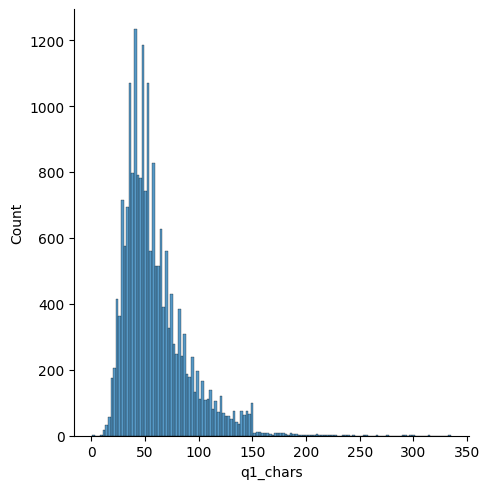

In [47]:

sns.displot(new_df["q1_chars"])

In [48]:
print("Minimum No, of Characters", new_df["q1_chars"].min())

Minimum No, of Characters 1


In [49]:
print("Maximum No. of Characters", new_df["q1_chars"].max())

Maximum No. of Characters 335


In [50]:
print("Average No. of Characters", int(new_df["q1_chars"].mean()))

Average No. of Characters 59


## Features Anaysis of Question 2

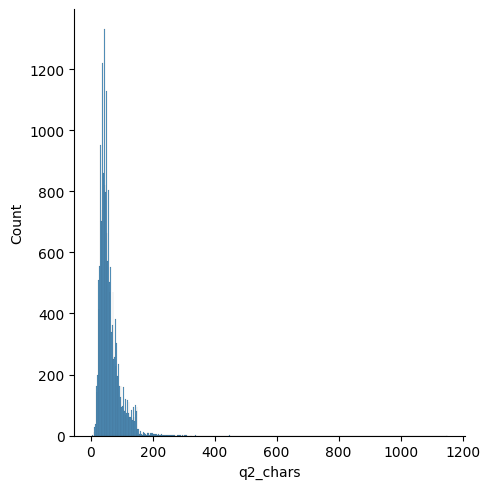

In [51]:
sns.displot(new_df["q2_chars"])

In [52]:
print("Minimum No. of Characters", new_df["q2_chars"].min())

Minimum No. of Characters 5


In [53]:
print("Maximum No. of Characters", new_df["q2_chars"].max())

Maximum No. of Characters 1151


In [54]:
print("Average No. of Characters", int(new_df["q2_chars"].mean()))

Average No. of Characters 60


## Features Anaysis of Question 1 Words

(array([2.000e+00, 3.000e+00, 1.680e+02, 0.000e+00, 4.830e+02, 9.480e+02,
        1.515e+03, 0.000e+00, 2.156e+03, 2.254e+03, 0.000e+00, 2.230e+03,
        1.975e+03, 1.496e+03, 0.000e+00, 1.192e+03, 9.360e+02, 0.000e+00,
        8.170e+02, 6.490e+02, 5.400e+02, 0.000e+00, 4.410e+02, 3.680e+02,
        0.000e+00, 2.880e+02, 2.970e+02, 1.990e+02, 0.000e+00, 1.810e+02,
        1.560e+02, 1.170e+02, 0.000e+00, 1.150e+02, 1.000e+02, 0.000e+00,
        6.800e+01, 6.600e+01, 6.000e+01, 0.000e+00, 3.400e+01, 2.900e+01,
        0.000e+00, 2.700e+01, 1.400e+01, 1.000e+01, 0.000e+00, 1.400e+01,
        6.000e+00, 0.000e+00, 5.000e+00, 5.000e+00, 5.000e+00, 0.000e+00,
        6.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

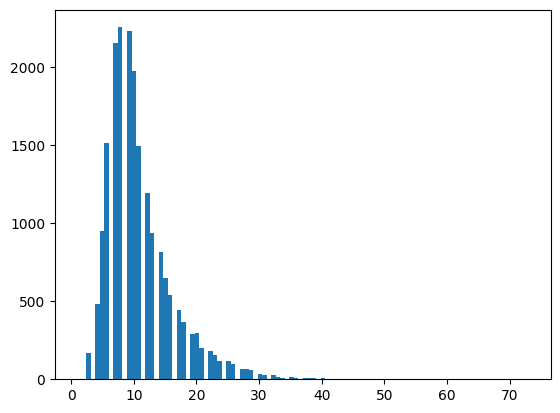

In [55]:
plt.hist(new_df["num_of_words_q1"],bins=100)

In [56]:
print("Minimum No. of Characters", new_df["num_of_words_q1"].min())

Minimum No. of Characters 1


In [57]:
print("Maximum No. of Characters", new_df["num_of_words_q1"].max())

Maximum No. of Characters 73


In [58]:
print("Average No. of Characters", int(new_df["num_of_words_q1"].mean()))

Average No. of Characters 10


## Features Anaysis of Question 2 Words

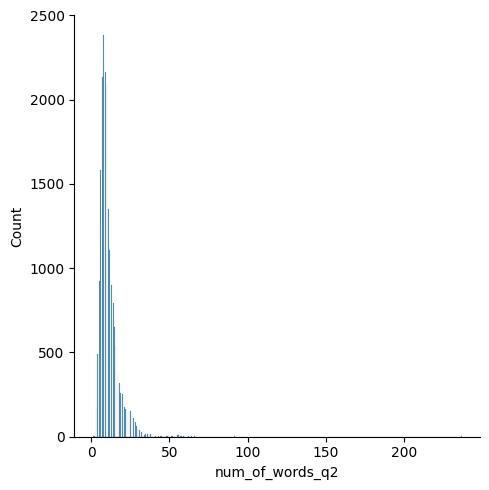

In [59]:
sns.displot(new_df["num_of_words_q2"])

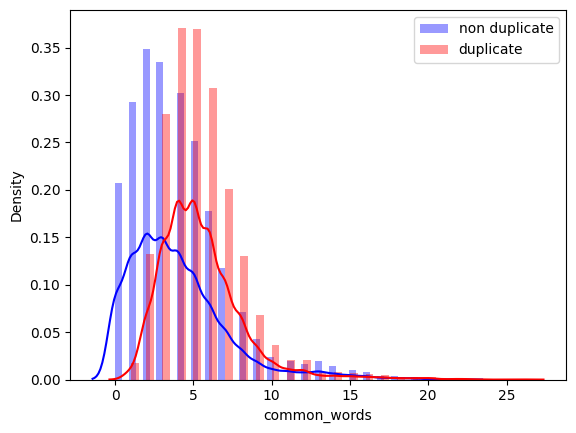

In [60]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate',color="b")
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate',color="r")

plt.legend()
plt.show()

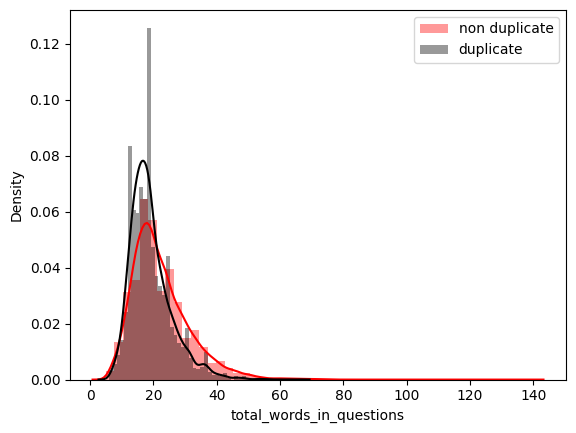

In [61]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words_in_questions'],label='non duplicate', color="r")
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words_in_questions'],label='duplicate', color="black")
plt.legend()
plt.show()

In [62]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions,shared_words_in_questions
187265,187265,61254,82970,Are we near World War 3?,Is World War 3 closer than it has ever been?,1,24,44,6,10,2,16,0.125000
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,38,47,7,8,5,15,0.333333


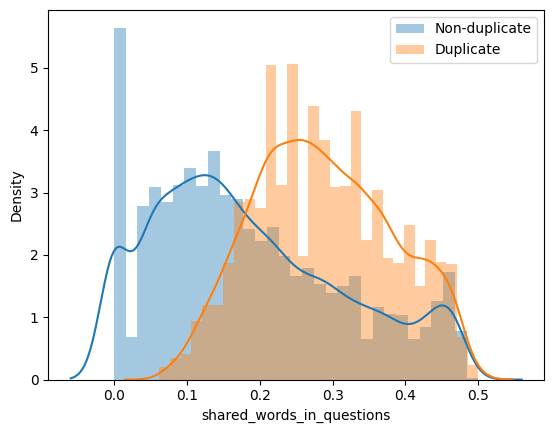

In [63]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]["shared_words_in_questions"],label='Non-duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['shared_words_in_questions'],label='Duplicate')
plt.legend()
plt.show()

In [64]:
ques_df = new_df[['question1','question2']]

In [65]:
ques_df.head(5)

,question1,question2
187265,Are we near World War 3?,Is World War 3 closer than it has ever been?
6557,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?
139264,Why are Newton's rings circular in shape? Why ...,Why is a circular ring pattern obtained in New...
240135,How does Wikipedia ensure content quality / au...,How does Wikipedia keep content quality high?
3336,Height: How would a 14 year old increase his h...,How should I increase my height?


In [66]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(20000, 8)


,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions,shared_words_in_questions
187265,1,24,44,6,10,2,16,0.125000
6557,1,38,47,7,8,5,15,0.333333
139264,0,76,64,14,11,4,22,0.181818
240135,1,71,45,10,7,5,17,0.294118
3336,1,52,32,10,6,3,16,0.187500


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [68]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(20000, 6000)

In [69]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(20000, 6008)


,is_duplicate,q1_chars,q2_chars,num_of_words_q1,num_of_words_q2,common_words,total_words_in_questions,shared_words_in_questions,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
187265,1,24,44,6,10,2,16,0.125000,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,1,38,47,7,8,5,15,0.333333,0,0,...,0,0,0,0,0,0,0,0,0,0
139264,0,76,64,14,11,4,22,0.181818,0,0,...,0,0,0,0,0,0,0,0,0,0
240135,1,71,45,10,7,5,17,0.294118,0,0,...,0,0,0,0,0,0,0,0,0,0
3336,1,52,32,10,6,3,16,0.187500,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7585

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.75575